<a href="https://colab.research.google.com/github/OmkarDolas/Deep-Learning/blob/main/Lab2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



data=pd.read_csv("data.csv")
print(data.head())

   Model year   Make         Model Vehicle class  Engine size (L)  Cylinders  \
0        1995  Acura       Integra    Subcompact              1.8          4   
1        1995  Acura       Integra    Subcompact              1.8          4   
2        1995  Acura  Integra GS-R    Subcompact              1.8          4   
3        1995  Acura        Legend       Compact              3.2          6   
4        1995  Acura  Legend Coupe       Compact              3.2          6   

  Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
0           A4         X             10.2                 7.0   
1           M5         X              9.6                 7.0   
2           M5         Z              9.4                 7.0   
3           A4         Z             12.6                 8.9   
4           A4         Z             13.0                 9.3   

   Combined (L/100 km)  Combined (mpg)  CO2 emissions (g/km)  
0                  8.8              32                   202  
1 

In [49]:
data.columns=data.columns.str.replace(" ","")

In [61]:

data.isna().sum()
data.rename(columns={'Combined(mpg)':'CO2'},inplace=True)
print(data.columns)

Index(['Modelyear', 'Make', 'Model', 'Vehicleclass', 'Enginesize(L)',
       'Cylinders', 'Transmission', 'Fueltype', 'City(L/100km)',
       'Highway(L/100km)', 'Combined(L/100km)', 'CO2', 'CO2emissions(g/km)'],
      dtype='object', name='Combined(mpg)')


In [74]:

x=data[['Modelyear', 'Enginesize(L)', 'Cylinders']]
y=data['CO2']

In [75]:
# Feature normalization (Standardization)
X_mean = np.mean(x, axis=0)
X_std = np.std(x, axis=0)
X_scaled = (x - X_mean) / X_std

In [76]:
# Adding bias term (x0 = 1)
m, n = X_scaled.shape
X_scaled = np.c_[np.ones(m), X_scaled]

In [77]:
# Gradient Descent parameters
alpha = 0.001  # Learning rate
iterations = 1000  # Number of iterations
theta = np.zeros((n + 1, 1))  # Initialize theta parameters

In [78]:
# Gradient Descent Loop
cost_history = []

In [80]:
print("Shape of X_scaled:", X_scaled.shape)  # Should be (m, n+1)
print("Shape of theta:", theta.shape)        # Should be (n+1, 1)
print("Shape of y:", y.shape)                # Should be (m, 1)


Shape of X_scaled: (17766, 4)
Shape of theta: (4, 1)
Shape of y: (17766,)


## Task -1: For loop approach

In [83]:
for _ in range(iterations):
    predictions = X_scaled.dot(theta)  # Compute predictions
    error = predictions - y  # Compute error
    gradient = (1/m) * X_scaled.T.dot(error)  # Compute gradient
    theta -= alpha * gradient  # Update theta
    cost = (1/(2*m)) * np.sum(error**2)  # Compute cost function
    cost_history.append(cost)

In [82]:
y = np.array(y).reshape(-1, 1)


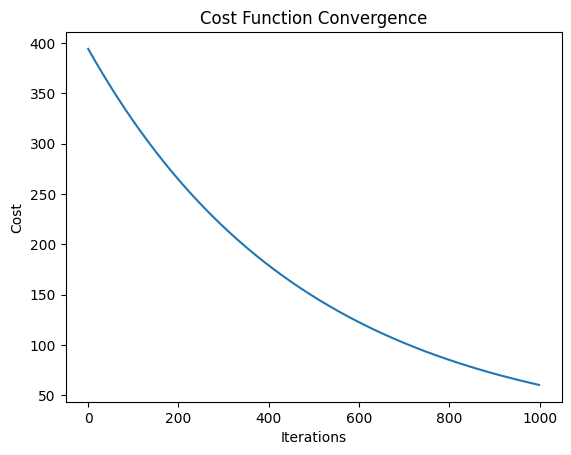

In [84]:
# Plot Cost Function Convergence
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

In [85]:
# Predict CO2 emissions using optimized theta
y_pred = X_scaled.dot(theta)

In [88]:
# Evaluate model performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [90]:
# Display results
print(" Optimized Parameters (Theta):\n", theta.flatten())
print("Final Cost:", cost_history[-1])
print(" Mean Squared Error (MSE):", mse)
print(" R² Score:", r2)

 Optimized Parameters (Theta):
 [17.14408118  0.73284749 -2.62818493 -2.27855502]
Final Cost: 60.40408444493716
 Mean Squared Error (MSE): 120.6057411490495
 R² Score: -1.2643602738100017


##Task 2: The linear algebra approach

In [91]:
for _ in range(iterations):
    predictions = X_scaled @ theta  # Vectorized hypothesis function
    error = predictions - y  # Error calculation
    gradient = (1/m) * (X_scaled.T @ error)  # Vectorized gradient computation
    theta -= alpha * gradient  # Update theta
    cost = (1/(2*m)) * np.sum(error**2)  # Compute cost function
    cost_history.append(cost)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

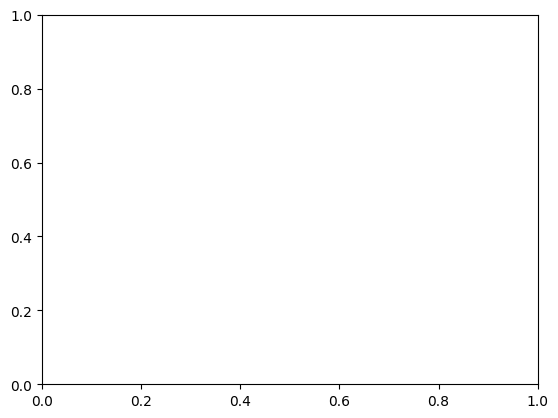

In [93]:
cost_history = []
# Plot Cost Function Convergence
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

# Predict CO2 emissions using optimized theta
y_pred = X_scaled @ theta

# Evaluate model performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Store results in a structured DataFrame
results_df = pd.DataFrame({
    "Metric": ["Optimized Theta (Parameters)", "Mean Squared Error (MSE)", "R² Score"],
    "Value": [str(theta.flatten()), mse, r2]  # Convert theta array to string for display
})

# Print the results
print(results_df)

# Return optimized theta, MSE, and R² score
theta.flatten(), mse, r2

In [94]:
np.zeros((3, 1))

array([[0.],
       [0.],
       [0.]])

In [95]:
m = 1000
n = 1_000_000
np.random.rand(m,n)

array([[0.91055641, 0.81518111, 0.12497528, ..., 0.04187844, 0.67547198,
        0.348037  ],
       [0.96499006, 0.82343209, 0.00982929, ..., 0.72541001, 0.27533277,
        0.19019092],
       [0.2843612 , 0.94807803, 0.8863488 , ..., 0.11283302, 0.94327204,
        0.44932169],
       ...,
       [0.90719978, 0.45832955, 0.45191964, ..., 0.57063521, 0.48603854,
        0.46494754],
       [0.745095  , 0.29747394, 0.71622051, ..., 0.94016523, 0.30685297,
        0.65716757],
       [0.92624973, 0.09736546, 0.54027062, ..., 0.02370238, 0.11672411,
        0.0682066 ]])